# import library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

/home/chams/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# load csv

In [3]:
df = pd.read_csv('tips (data for regression problem).csv')

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# variationin in tips among different caterogies

In [6]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['tip'] >= (Q1 - 1.5 * IQR)) & (df['tip'] <= (Q3 + 1.5 * IQR))]


In [7]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/tmp/ipykernel_23680/3764731584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='size', y='tip', data=mean_tip_by_size, palette='viridis')


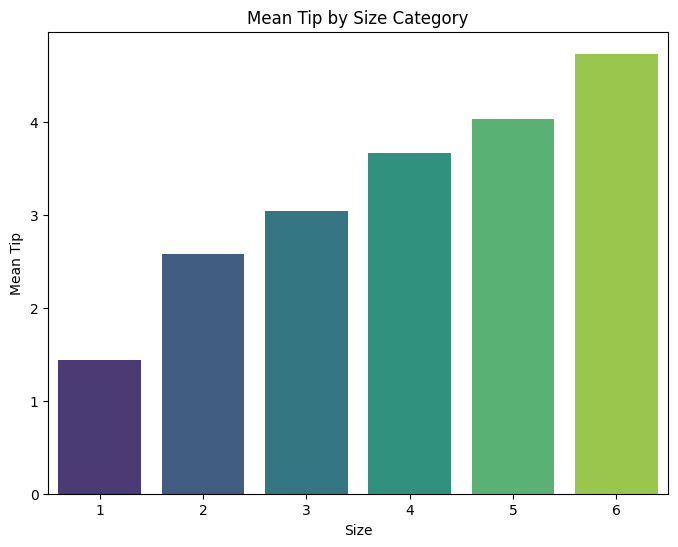

In [8]:
# Calculate mean tip for each size category
mean_tip_by_size = df.groupby('size')['tip'].mean().reset_index()

# Plot the mean tips for each size category
plt.figure(figsize=(8, 6))
sns.barplot(x='size', y='tip', data=mean_tip_by_size, palette='viridis')

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Mean Tip')
plt.title('Mean Tip by Size Category')
plt.show()


/tmp/ipykernel_23680/659196265.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='tip', data=mean_tip_by_size, palette='viridis')


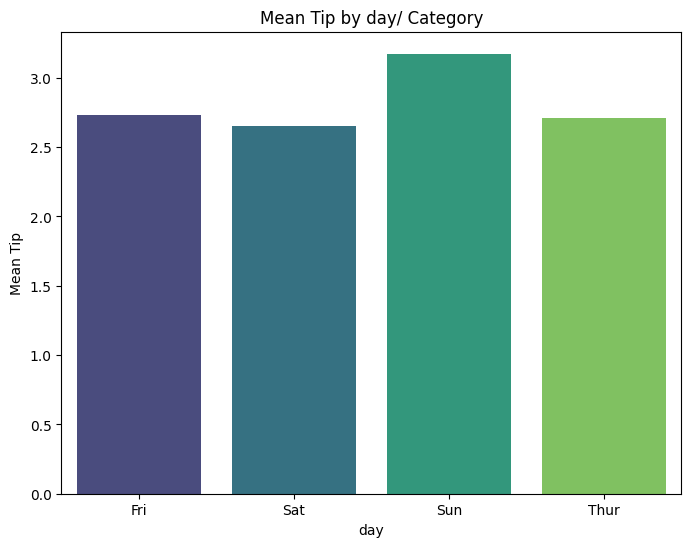

In [9]:
# Calculate mean tip for each size category
mean_tip_by_size = df.groupby('day')['tip'].mean().reset_index()

# Plot the mean tips for each size category
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='tip', data=mean_tip_by_size, palette='viridis')

# Add labels and title
plt.xlabel('day')
plt.ylabel('Mean Tip')
plt.title('Mean Tip by day/ Category')
plt.show()

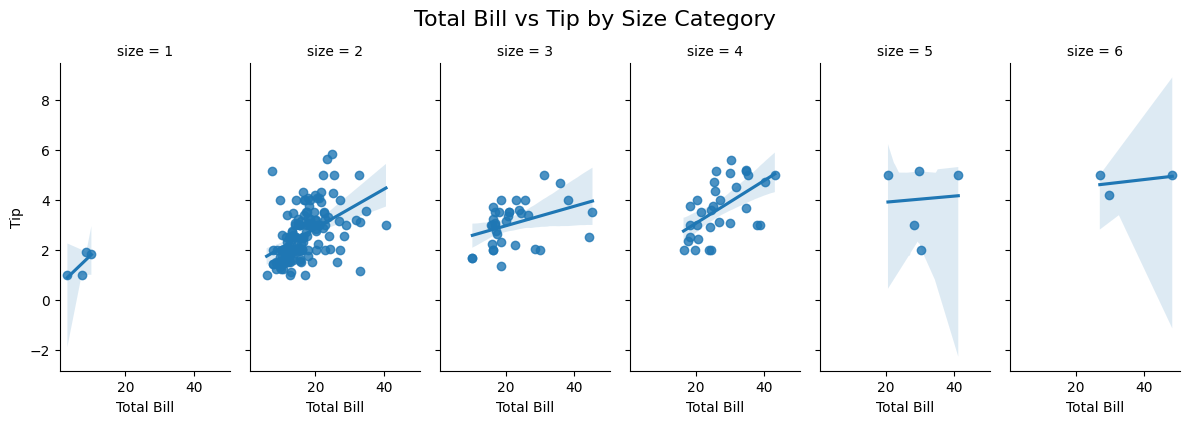

In [10]:
# Increase size of FacetGrid
g = sns.FacetGrid(df, col='size', height=4, aspect=0.5)  # Adjust height and aspect as needed
g.map(sns.regplot, 'total_bill', 'tip')
g.set_axis_labels('Total Bill', 'Tip')
g.fig.suptitle('Total Bill vs Tip by Size Category', y=1.05, fontsize=16)  # Increase title size
plt.show()



In [44]:
correlations = df.groupby('size').apply(lambda group: group['total_bill'].corr(group['tip']))

print(correlations)
np.corrcoef(df.tip,df.total_bill)[0,1]

size
1    0.781938
2    0.481151
3    0.379352
4    0.564501
5    0.062186
6    0.392697
dtype: float64


0.5950651892672254

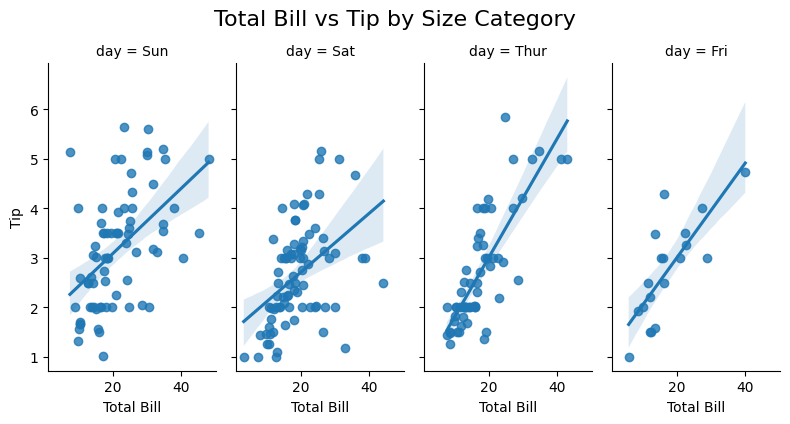

In [11]:
g = sns.FacetGrid(df, col='day', height=4, aspect=0.5)  # Adjust height and aspect as needed
g.map(sns.regplot, 'total_bill', 'tip')
g.set_axis_labels('Total Bill', 'Tip')
g.fig.suptitle('Total Bill vs Tip by Size Category', y=1.05, fontsize=16)  # Increase title size
plt.show()

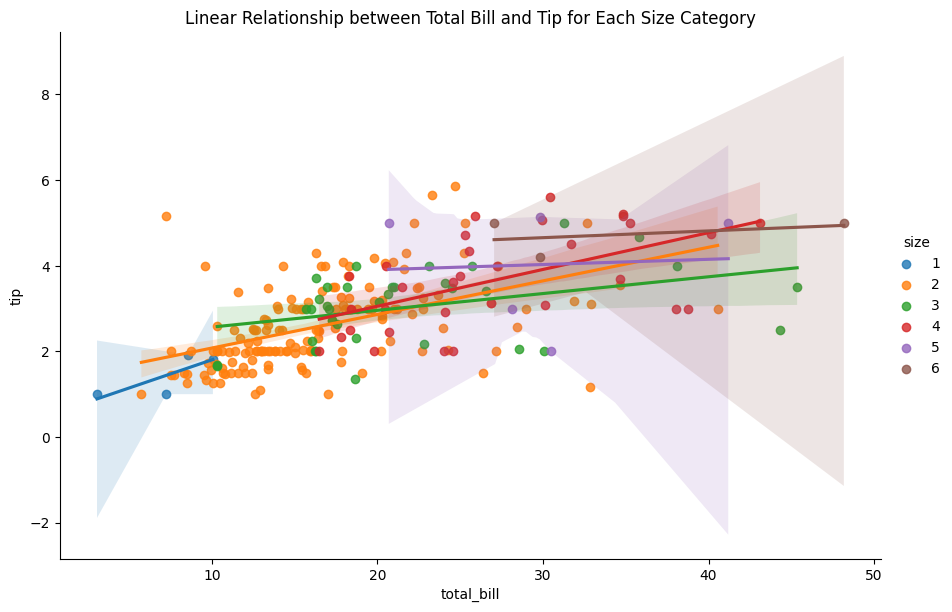

In [12]:
import seaborn as sns

# Fit a linear regression model for each size category
sns.lmplot(x='total_bill', y='tip', hue='size', data=df, aspect=1.5, height=6)
plt.title('Linear Relationship between Total Bill and Tip for Each Size Category')
plt.show()


# get the data ready for the model

/tmp/ipykernel_23680/2492803293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='size', y='tip', data=df, palette='Set2')


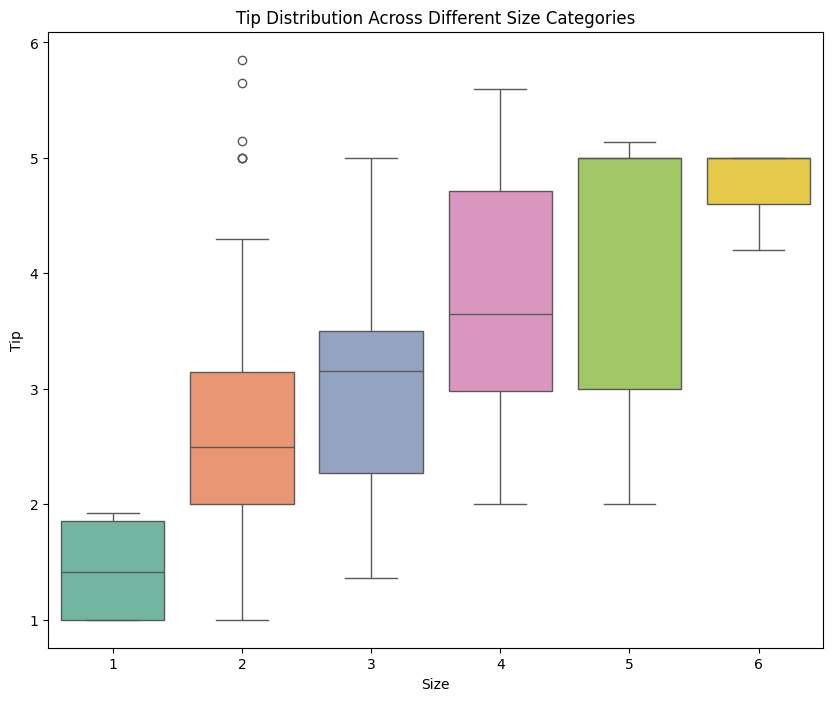

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='size', y='tip', data=df, palette='Set2')
plt.xlabel('Size')
plt.ylabel('Tip')
plt.title('Tip Distribution Across Different Size Categories')
plt.show()


In [14]:
# One-hot encode categorical columns: 'sex', 'smoker', 'day', 'time'
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time','size']).astype(float)

# Display the updated DataFrame with one-hot encoded columns
df_encoded


,total_bill,tip,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,16.99,1.01,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10.34,1.66,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,21.01,3.50,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,23.68,3.31,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24.59,3.61,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
240,27.18,2.00,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
241,22.67,2.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
242,17.82,1.75,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: ylabel='tip'>

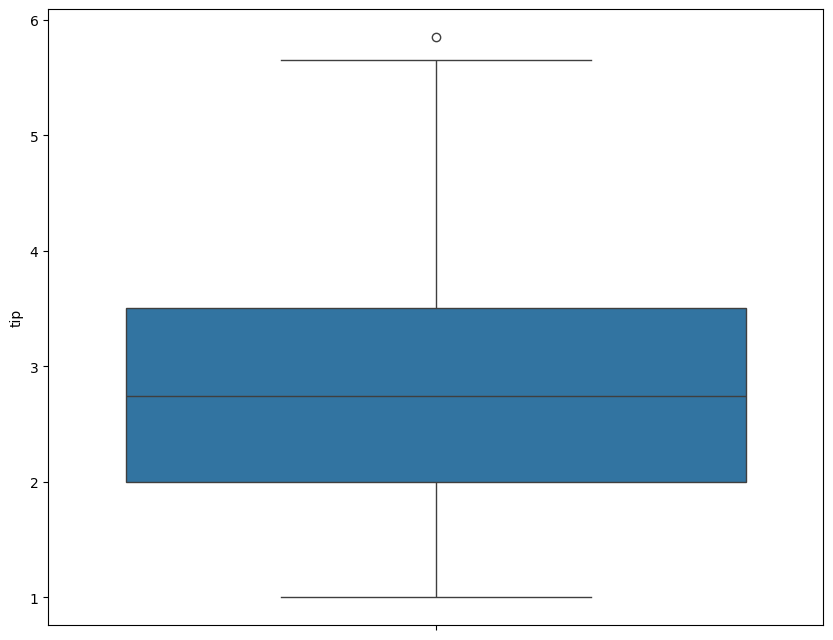

In [15]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='tip', data=df_encoded)

In [16]:
x= df_encoded.drop('tip',axis=1)
y= df_encoded.tip

In [17]:
m= x.total_bill.mean()
sd= x.total_bill.std()
x.total_bill= (x.total_bill-m)/sd

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=10)
    # Fit the model
model_knn.fit(X_train, y_train)
    
    # Predict on the test set
y_pred = model_knn.predict(X_test)
    
    # Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = model_knn.score(X_test, y_test)  # R-squared score of the model
    # Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.6705226595744682
R-squared: 0.4083324551966544


In [22]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
    # Predict on the test set
y_pred = model_lr.predict(X_test)
    
    # Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = model_lr.score(X_test, y_test)  # R-squared score of the model
    # Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.6699768053925254
R-squared: 0.4088141155835766


In [23]:
from sklearn.svm import SVR


# Train an SVR model (Support Vector Regression) using RBF kernel
svm_model = SVR(kernel='rbf',C= 9, epsilon= 0.09, gamma= 0.04)  # Radial Basis Function kernel (default)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model using R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = svm_model.score(X_test, y_test)  # R-squared score of the model
# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5165714000237025
R-squared: 0.5441786677848928


using Ridge and Lasso

In [24]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge R-squared:", r2_score(y_test, ridge_pred))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso R-squared:", r2_score(y_test, lasso_pred))

Ridge R-squared: 0.40468622074883154
Lasso R-squared: 0.35002241331085293


In [25]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=12, min_samples_leaf=9, random_state=2)
tree_regressor.fit(X_train, y_train)


# Make predictions
y_pred = tree_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.4797577575908003


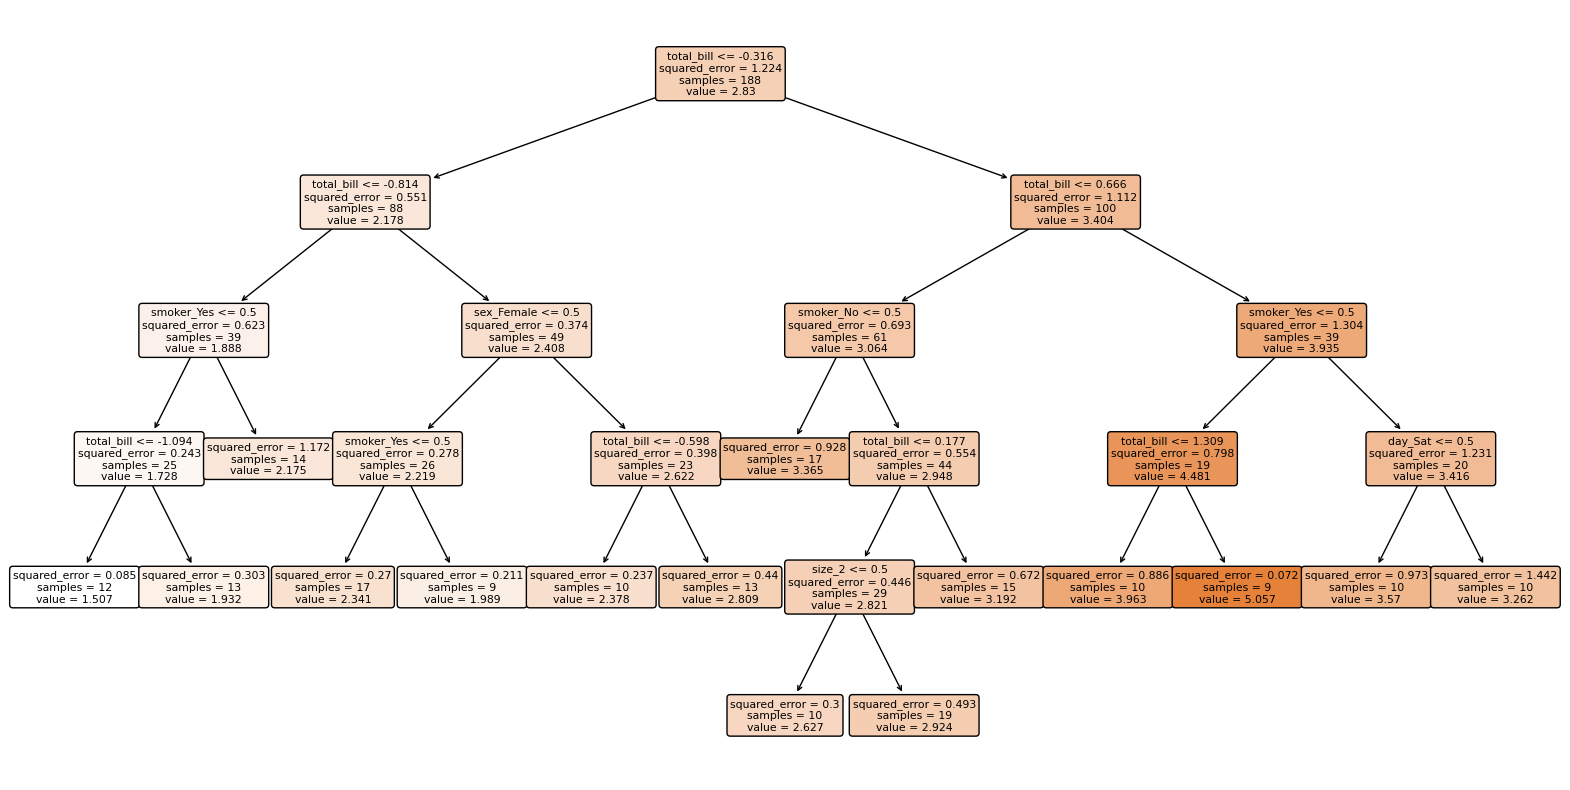

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, filled=True, feature_names=x.columns, rounded=True)
plt.show()


In [27]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.47673872859976285


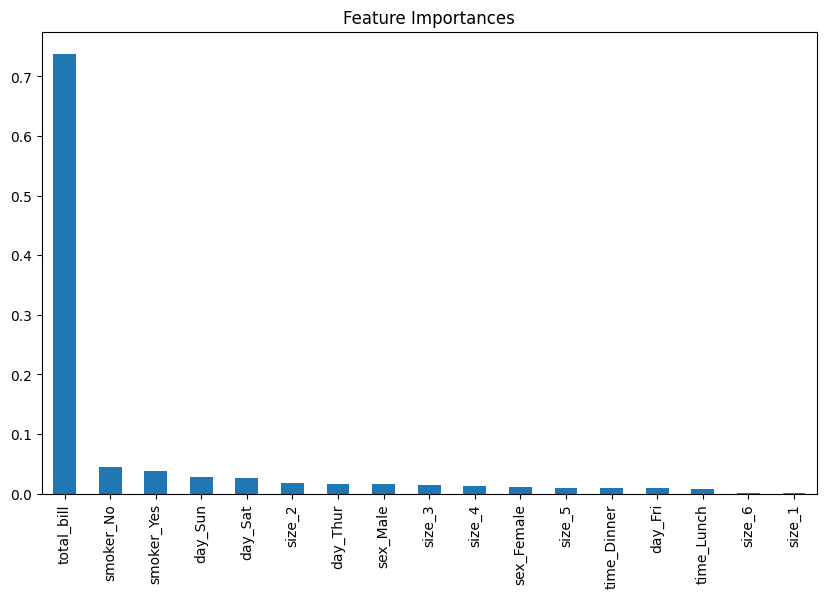

In [28]:

# Get feature importances
feature_importances = rf_regressor.feature_importances_
features = x.columns  # Assuming X is a DataFrame

# Plot feature importances
plt.figure(figsize=(10, 6))
pd.Series(feature_importances, index=features).sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances")
plt.show()


<Figure size 800x600 with 0 Axes>

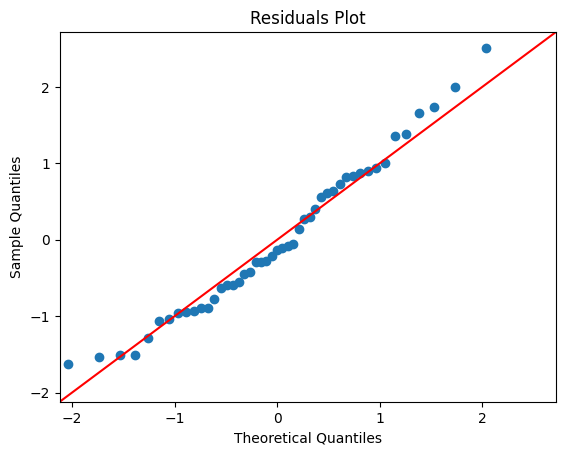

In [38]:
residuals = y_test - svm_model.predict(X_test)

import statsmodels.api as sm

# Plotting residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Residuals Plot')
plt.show()


# conclusion and some insight 